In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [2]:
%cd DRL-for-Automated-Stock-Trading--main/

/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main


In [3]:
#Classes to implement: 
#Init, select_action, explore_env, update_net

In [5]:
!pip install git+https://github.com/mingl2000/Elegant-FinRL.git
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/mingl2000/Elegant-FinRL.git to /tmp/pip-req-build-gui0odg8
  Running command git clone -q https://github.com/mingl2000/Elegant-FinRL.git /tmp/pip-req-build-gui0odg8
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-n_8htss5
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-n_8htss5


In [6]:
#Imports for enviornment and agent 
from elegant_drl_model.run import *
#from elegant_finrl.agent import AgentPPO, AgentDDPG
from elegant_drl_model.env import StockTradingEnv
from elegant_drl_model import agent
import yfinance as yf
from stockstats import StockDataFrame as Sdf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [7]:
# Setup the agent 
args = Arguments(if_on_policy=True)
#args.agent = agent.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()
args.agent = agent.AgentTRPO()
args.agent.if_use_gae = True
args.agent.lambda_entropy = 0.04

# Environment
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 
           'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ',
           'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']  

tech_indicator_list = [
  'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
  'close_30_sma', 'close_60_sma']  # finrl.config.TECHNICAL_INDICATORS_LIST

gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2009-01-01'
start_eval_date = '2019-01-01'
end_eval_date = '2021-01-01'

args.env = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=False)
args.env_eval = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=True)

args.env.target_reward = 2
args.env_eval.target_reward = 2

# Hyperparameters
args.gamma = gamma
args.tau = 0.97
args.l2_reg = 1e-3
args.max_k1 = 1e-2
args.damping = 1e-1
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
#args.repeat_times = 2 ** 3
args.repeat_times = 1
args.target_step = 2 ** 8
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = True #NOTE: Originally False
args.rollout_num = 2 # the number of rollout workers (larger is not always faster)

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list


In [8]:
#from importlib import reload  # Py3 only; unneeded in py2.
#args.agent = reload(agent)

In [9]:
#Train agent 
train_and_evaluate_mp(args) # the training process will terminate once it reaches the target reward.


| multiprocessing, act_workers: 2
| multiprocessing, None:
| GPU id: 0, cwd: ./AgentTRPO/StockTradingEnv-v2_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC
Done training boss uwu
0   0.00e+00      1.10 |
Done training boss uwu
Done training boss uwu
0   1.51e+04      1.10 |    1.06      0.19      -0.00    -79.54
Done training boss uwu
Done training boss uwu
0   2.01e+04      1.18 |
Done training boss uwu
0   3.02e+04      1.18 |    1.11      0.13      -0.00     -2.21
Done training boss uwu
Done training boss uwu
Done training boss uwu
0   4.53e+04      1.18 |    1.07      0.13      -0.00  -62698.21
Done training boss uwu
Done training boss uwu
Done training boss uwu
0   6.04e+04      1.18 |    1.07      0.15      -0.00   -725.38
Done training boss uwu
Done training boss uwu
Done training boss uwu
0   7.54e+04      1.18 |    1.05      0.09       0.00  -65334.61
Done training boss uwu
Done training boss uwu
Done training boss uwu
0   9.05e+04      1.18 

In [10]:
#Draw graphs baka 

args = Arguments(if_on_policy=True)
args.agent = agent.AgentTRPO()
args.env = StockTradingEnv(cwd='./', if_eval=True)
args.if_remove = False
args.cwd = './AgentTRPO/StockTradingEnv-v2_0'
args.init_before_training()

prediction = args.env.trade_prediction(args, torch)




| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| GPU id: 0, cwd: ./AgentTRPO/StockTradingEnv-v2_0
Loaded act: ./AgentTRPO/StockTradingEnv-v2_0


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


/content/drive/MyDrive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/env.py:366: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_df = data_df.drop("adjcp", 1)


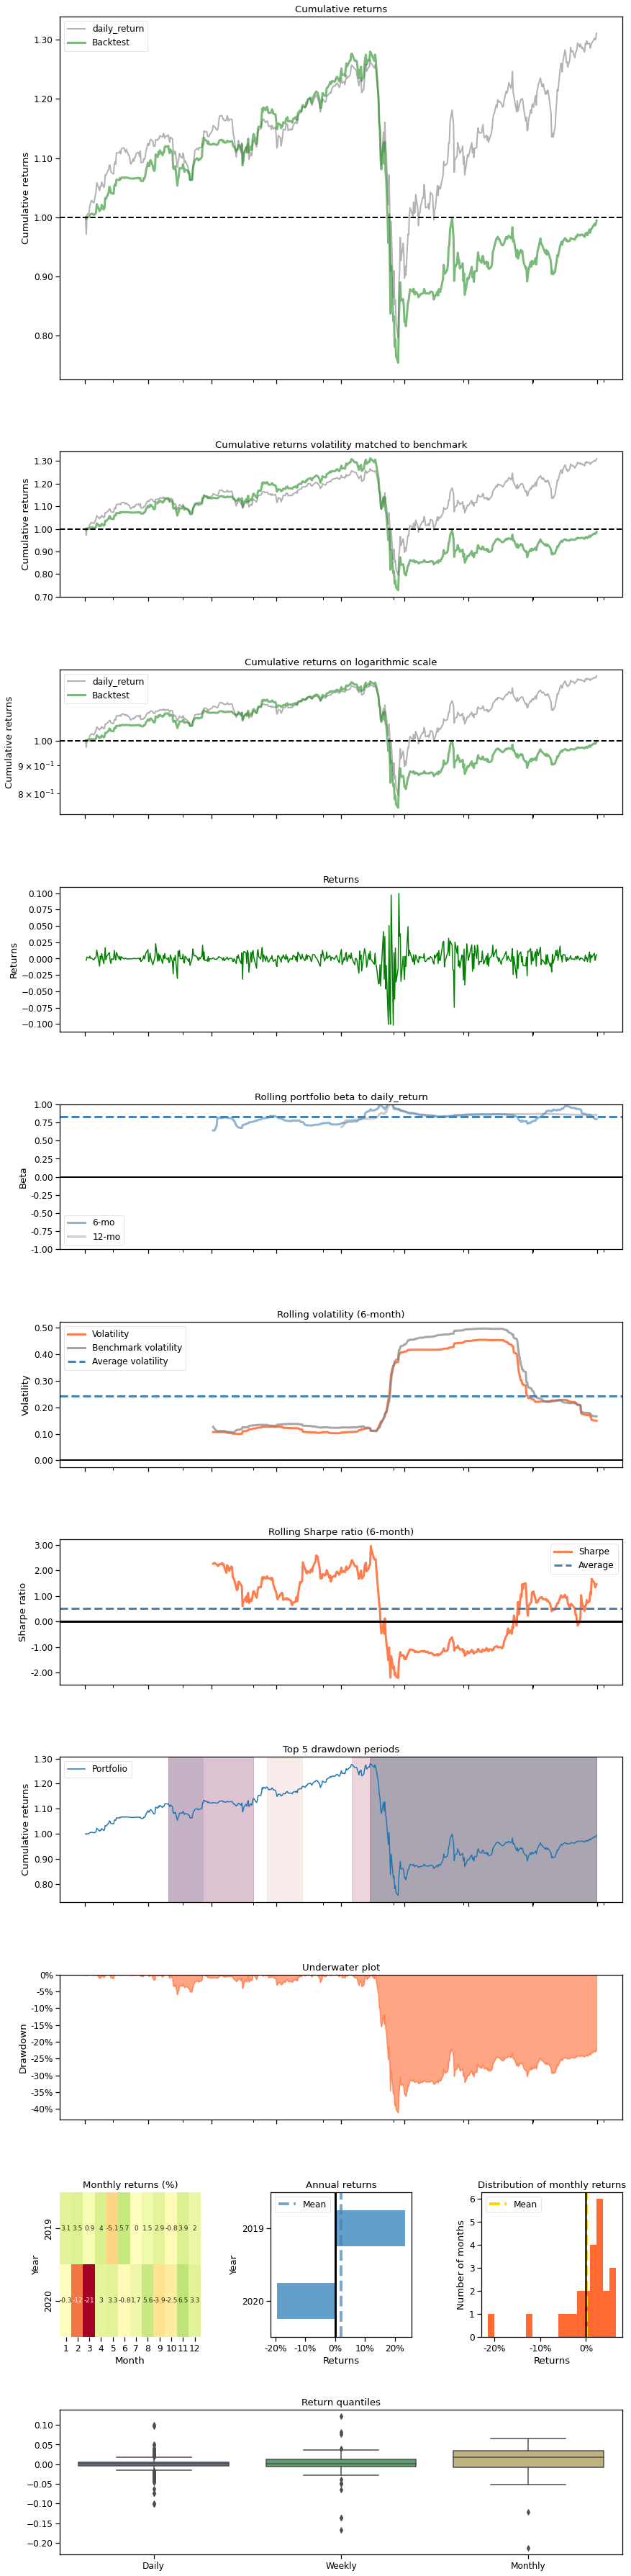

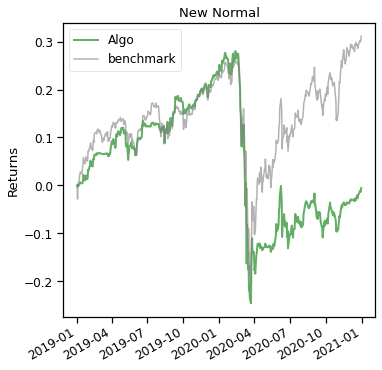

In [11]:
#draw graphs baka (cont.)
args.env.backtest_plot(prediction, baseline_ticker = '^DJI', baseline_start = '2019-01-01', baseline_end = '2021-01-01')